## 1. Instalação e Download de Dados

In [1]:
!pip install imblearn
!pip install tensorflow==2.15.1
!pip install inflect
!pip install typeguard
!pip install tensorflow-addons --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 665.5 kB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.7 MB/s eta 0:00:00


# 2. Importação de Bibliotecas

In [2]:
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM

tf.random.set_seed(42)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# 3. Baixando os Dados que estão no Drive

Os dados históricos de consumo de água e fraudes são baixados utilizando o comando gdown, uma ferramenta para baixar arquivos do Google Drive.


In [3]:
!gdown 1-CvuD_GGZlfkdrHDDLBA5xLtKhZjPIWQ # 2019
!gdown 1AfqPM-BDVN0c8m53mX1fLXpMrT8bOAjb # 2020
!gdown 1cnUwErnjNPzItDjYFGc4wU5t8CNXSN0c # 2021
!gdown 1S8f5e9BwkVJm2G_901Sn3P0JnrgQXa0O # 2022
!gdown 1C8m_BeLQN8InNGjzpU_KoY5FXPZpBYRH # 2023
!gdown 1O-pqJ0_PEB0G9ZICiWo8uDDCV9Go1Ry5 # 2024

!gdown 1rEFc2mSTO6ud89Mk5CulzbreachKHgSk # Fraudes

Downloading...
From (original): https://drive.google.com/uc?id=1-CvuD_GGZlfkdrHDDLBA5xLtKhZjPIWQ
From (redirected): https://drive.google.com/uc?id=1-CvuD_GGZlfkdrHDDLBA5xLtKhZjPIWQ&confirm=t&uuid=1317cc8d-7776-4b9f-a49e-3f8bf583bcf2
To: /content/CONSUMO_2019.zip
100% 200M/200M [00:05<00:00, 35.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1AfqPM-BDVN0c8m53mX1fLXpMrT8bOAjb
From (redirected): https://drive.google.com/uc?id=1AfqPM-BDVN0c8m53mX1fLXpMrT8bOAjb&confirm=t&uuid=22a86c5e-4b1f-4761-974d-3cd89727413c
To: /content/CONSUMO_2020.zip
100% 211M/211M [00:05<00:00, 35.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1cnUwErnjNPzItDjYFGc4wU5t8CNXSN0c
From (redirected): https://drive.google.com/uc?id=1cnUwErnjNPzItDjYFGc4wU5t8CNXSN0c&confirm=t&uuid=5edb0070-8478-4ac2-9f29-a2e9b80cba2c
To: /content/CONSUMO_2021.zip
100% 212M/212M [00:05<00:00, 42.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1S8f5e9BwkVJm2G_901Sn3P0JnrgQXa

# 2019 - Base de Dados

In [4]:
df_2019 = pd.read_csv('/content/CONSUMO_2019.zip', delimiter=';')
df_2019.head(2)

<ipython-input-4-35be3d82a67b>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv('/content/CONSUMO_2019.zip', delimiter=';')


,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2019-12-01,18.0,75.0,80.0,31.0,17857536.0,453585.0,0.0,...,67-RETIDA - GRANDE CLIENTE,0.0,0.0,NaN,900.0,N,Isento Agua e Esgoto,S,-20.477470,-54.761660
1,1,2.0,2019-09-01,19.0,62.0,150.0,32.0,17945983.0,870031.0,0.0,...,01-EM MAOS,-2.0,0.0,NaN,900.0,N,Normal,S,-20.413378,-54.555052


In [5]:
# Amostra de 30% dos dados
df_2019_amostra = df_2019.sample(frac=0.3, random_state=1)

# 2020 - Base de Dados

In [6]:
df_2020 = pd.read_csv('/content/CONSUMO_2020.zip', delimiter=';')
df_2020.head(2)

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2020-05-01,6.0,25.0,136.0,20.0,17878422.0,1000092.0,0.0,...,69-RETIDA - CONSOLIDADO,0.0,0.0,NaN,900.0,N,Normal,S,-20.462311,-54.563373
1,1,2.0,2020-10-01,9.0,1.0,68.0,1.0,17843197.0,399664.0,0.0,...,62-RETIDA - NÃO IMPRESSA,0.0,0.0,MEDIA,107.0,N,Normal,N,-20.460588,-54.610802


In [7]:
# Amostra de 30% dos dados
df_2020_amostra = df_2020.sample(frac=0.3, random_state=1)

# 2021 - Base de Dados

In [8]:
df_2021 = pd.read_csv('/content/CONSUMO_2021.zip', delimiter=';')
df_2021.head(2)

<ipython-input-8-b1200eba0b76>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv('/content/CONSUMO_2021.zip', delimiter=';')


,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2021-06-01,12.0,55.0,74.0,31.0,17233802.0,813089.0,1.0,...,02-CAIXA CORREIO,0.0,0.0,NaN,900.0,N,Normal,S,-20.474361,-54.552343
1,1,2.0,2021-01-01,21.0,62.0,150.0,54.0,17945983.0,870031.0,0.0,...,01-EM MAOS,0.0,0.0,NaN,908.0,N,Normal,S,-20.413378,-54.555052


In [9]:
# Amostra de 30% dos dados
df_2021_amostra = df_2021.sample(frac=0.3, random_state=1)

# 2022 - Base de Dados

In [10]:
df_2022 = pd.read_csv('/content/CONSUMO_2022.zip', delimiter=';')
df_2022.head(2)

<ipython-input-10-b7cf9befa12c>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('/content/CONSUMO_2022.zip', delimiter=';')


,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2022-02-01,6.0,42.0,156.0,27.0,17224682.0,123755.0,0.0,...,10-ISENTA - NAO IMPRESSA,0.0,0.0,MEDIA,107.0,N,Normal,N,-20.493049,-54.669201
1,1,2.0,2022-05-01,50.0,1.0,56.0,1.0,17386534.0,183125.0,1.0,...,02-CAIXA CORREIO,0.0,0.0,NaN,900.0,N,Normal,S,-20.986346,-54.508939


In [11]:
# Amostra de 30% dos dados
df_2022_amostra = df_2022.sample(frac=0.3, random_state=1)

# 2023 - Base de Dados

In [12]:
df_2023 = pd.read_csv('/content/CONSUMO_2023.zip', delimiter=';')
df_2023.head(2)

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2023-01-01,8.0,1.0,126.0,1.0,17089633.0,309250.0,0.0,...,04-FIXADA AO PORTAO,0.0,0.0,NaN,900.0,N,Normal,S,-20.459359,-54.604419
1,1,2.0,2023-03-01,50.0,1.0,22.0,1.0,17250292.0,134314.0,0.0,...,10-ISENTA - NAO IMPRESSA,0.0,0.0,NaN,900.0,N,Normal,S,-20.978884,-54.505892


In [13]:
# Amostra de 30% dos dados
df_2023_amostra = df_2023.sample(frac=0.3, random_state=1)

# 2024 - Base de Dados

In [14]:
df_2024 = pd.read_csv('/content/CONSUMO_2024.zip', delimiter=';')
df_2024.head(2)

<ipython-input-14-b46e3ac54d39>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv('/content/CONSUMO_2024.zip', delimiter=';')


,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2024-05-01,4.0,17.0,16.0,11.0,17188010.0,581756.0,0.0,...,63-RETIDA - FATURA ELETRONICA,-21.0,0.0,NaN,901.0,N,Normal,S,-20.460904,-54.634308
1,1,2.0,2024-06-01,4.0,87.0,60.0,38.0,17424465.0,188809.0,1.0,...,00-NAO ENTREGUE,0.0,0.0,NaN,900.0,N,Normal,S,-20.520205,-54.602621


In [15]:
# Amostra de 30% dos dados
df_2024_amostra = df_2024.sample(frac=0.3, random_state=1)

# Fraudes - Base de Dados

In [16]:
df_fraudes = pd.read_csv('/content/FRAUDES_HIST.zip', delimiter=';')
df_fraudes.head(2)

,Unnamed: 0,TIPOOS,ANOOS,IDOSP,ANOMES,MATRICULA,OS,SERVICO,DESCRICAO,COD_GRUPO,...,DS_SERVICO_SOLICITADO,FL_EXECUTADO,NM_TIPO_EXECUCAO,DT_LIMITE_EXECUCAO,DT_SERVICO,DT_FECHAMENTO,PARECER_EXECUCAO,FL_PROGRAMACAO_AUTOMATICA,NMCOMUNIDADE,AREAATUACAO
0,0,Desdobro,2023.0,230101031796,11/23,17229588,1031796,110013,IRREGULARIDADE IDENTIFICADA,NaN,...,VISTORIA DE IRREGULARIDADE - IMPEDIMENTO DE AC...,1.0,activityCompleted,2024-03-11 23:59:59,2023-11-06 00:00:00,2023-11-06 11:07:02,HD interno,NaN,NaN,NaN
1,1,Desdobro,2024.0,240100141765,02/24,17804014,141765,110013,IRREGULARIDADE IDENTIFICADA,NaN,...,VISTORIA DE IRREGULARIDADE,1.0,activityCompleted,2024-06-24 23:59:59,2024-02-13 00:00:00,2024-02-13 15:59:01,421,NaN,NaN,NaN


In [17]:
# Amostra de 30% dos dados
df_fraudes_amostra = df_fraudes.sample(frac=0.3, random_state=1)

## Definindo Fraudador - Nova Coluna

In [18]:
def definirFraudador(df, nome_coluna):

    df[nome_coluna] = 1

    return df

In [19]:
df_fraudes_amostra = definirFraudador(df_fraudes_amostra, 'FRAUDADOR')
df_fraudes_amostra.head(2)

,Unnamed: 0,TIPOOS,ANOOS,IDOSP,ANOMES,MATRICULA,OS,SERVICO,DESCRICAO,COD_GRUPO,...,FL_EXECUTADO,NM_TIPO_EXECUCAO,DT_LIMITE_EXECUCAO,DT_SERVICO,DT_FECHAMENTO,PARECER_EXECUCAO,FL_PROGRAMACAO_AUTOMATICA,NMCOMUNIDADE,AREAATUACAO,FRAUDADOR
72357,72357,OsOnline,2019.0,190100721673,11/19,17781977,100721673,2039,IRREGULARIDADE IDENTIFICADA,4.0,...,1.0,Executado,2019-11-27 23:59:59,2019-11-11 17:37:09,2019-11-11 16:37:12,NaN,0.0,NaN,NaN,1
144298,144298,OsOnline,2019.0,190100819125,12/19,17706214,100819125,2039,IRREGULARIDADE IDENTIFICADA,4.0,...,1.0,Executado,2020-01-14 23:59:59,2019-12-21 10:24:24,2019-12-21 09:24:25,413 violação no ramal,0.0,NaN,NaN,1


## Selecionando as Colunas Desejadas

In [20]:
df_fraudes_amostra = df_fraudes_amostra[['MATRICULA', 'FRAUDADOR']]

# 5. Juntando as Bases de Dados de Consumo

In [21]:
import pandas as pd

print(df_2019_amostra.columns == df_2020_amostra.columns)
print(df_2020_amostra.columns == df_2021_amostra.columns)
print(df_2021_amostra.columns == df_2022_amostra.columns)
print(df_2022_amostra.columns == df_2023_amostra.columns)
print(df_2023_amostra.columns == df_2024_amostra.columns)

df_total = pd.concat([df_2019_amostra, df_2020_amostra, df_2021_amostra, df_2022_amostra, df_2023_amostra, df_2024_amostra], ignore_index=True)

print(df_total.head())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True 

# 6. Juntando a Base de Dados de Consumo Total + Base de Dados de Fraudes

In [22]:
# Fazendo o merge com base na coluna 'MATRICULA'
df = pd.merge(df_total, df_fraudes_amostra, on='MATRICULA', how='left')

df.head(2)

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE,FRAUDADOR
0,995459,2.0,2019-01-01,12.0,83.0,524.0,38.0,17458973.0,426182.0,1.0,...,0.0,0.0,NaN,900.0,N,Normal,S,-20.533002,-54.649249,NaN
1,3500294,2.0,2019-10-01,9.0,63.0,196.0,36.0,17799736.0,282340.0,1.0,...,0.0,0.0,NaN,900.0,N,Normal,S,-20.390202,-54.566666,1.0


## Colocando o Valor 0 para as linhas com Nan

In [23]:
# Substituir NaN por 0 na coluna 'FRAUDADOR' e converter os valores para inteiro
df['FRAUDADOR'].fillna(0, inplace=True)
df['FRAUDADOR'] = df['FRAUDADOR'].astype(int)

In [24]:
df['DAT_LEITURA'] = pd.to_datetime(df['DAT_LEITURA'])
df['HORA_LEITURA'] = pd.to_numeric(df['HORA_LEITURA'], errors='coerce').fillna(0)

## Tratamento de Dados Nulos
- Decisão de manter ou excluir colunas com muitos valores bulos:
Se uma coluna contém uma alta proporção de valores nulos (ex. > 60%), talvez seja necessário removê-la, pois pode não fornecer informação útil ao modelo.

In [25]:
threshold = 0.6
df = df.dropna(thresh=int((1-threshold)*len(df)), axis=1)

In [26]:
colunasnumericas = df.select_dtypes(include=['float', 'int']).columns

# Preencha os NaN das colunas numéricas com a média
for column in colunasnumericas:
    mean_value = df[column].mean()
    df[column].replace(0.0, mean_value, inplace=True)
    df[column].fillna(mean_value, inplace=True)

df.head()

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE,FRAUDADOR
0,995459,2.0,2019-01-01,12.0,83.0,524.0,38.0,17458973.0,426182.0,1.0,...,01-EM MAOS,0.04283,0.331774,900.0,N,Normal,S,-20.533002,-54.649249,0.173295
1,3500294,2.0,2019-10-01,9.0,63.0,196.0,36.0,17799736.0,282340.0,1.0,...,01-EM MAOS,0.04283,0.331774,900.0,N,Normal,S,-20.390202,-54.566666,1.000000
2,3113548,2.0,2019-03-01,7.0,25.0,320.0,19.0,17705519.0,226743.0,1.0,...,04-FIXADA AO PORTAO,0.04283,0.331774,900.0,N,Normal,S,-20.472722,-54.570297,0.173295
3,2460808,2.0,2019-03-01,17.0,46.0,872.0,19.0,17820538.0,770190.0,1.0,...,02-CAIXA CORREIO,0.04283,0.331774,900.0,N,Normal,S,-20.507279,-54.634575,0.173295
4,1584748,2.0,2019-03-01,16.0,94.0,114.0,47.0,17939738.0,842509.0,1.0,...,02-CAIXA CORREIO,0.04283,0.331774,900.0,N,Normal,S,-20.549627,-54.611043,0.173295


## Normalização dos Dados

In [27]:
from sklearn.preprocessing import MinMaxScaler
colunasnumericas = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df[colunasnumericas] = scaler.fit_transform(df[colunasnumericas])

In [28]:
df['CATEGORIA']

,CATEGORIA
0,RESIDENCIAL
1,RESIDENCIAL
2,RESIDENCIAL
3,RESIDENCIAL
4,RESIDENCIAL
...,...
7742929,RESIDENCIAL
7742930,RESIDENCIAL
7742931,RESIDENCIAL
7742932,RESIDENCIAL


In [29]:
import pandas as pd

mapping = {
    'RESIDENCIAL': 0,
    'COMERCIAL': 1,
    'PUBLICA': 2,
    'INDUSTRIAL': 3
}

df['CATEGORIA'] = df['CATEGORIA'].map(mapping)

In [30]:
df['CATEGORIA']

,CATEGORIA
0,0
1,0
2,0
3,0
4,0
...,...
7742929,0
7742930,0
7742931,0
7742932,0


In [31]:
colunas_desejadas = ['MATRICULA', 'CONS_MEDIDO', 'CATEGORIA', 'COD_LATITUDE', 'COD_LONGITUDE', 'FRAUDADOR']

df = df[colunas_desejadas]

In [32]:
df_amostras = df.sample(frac=0.1, random_state=42)

In [33]:
timesteps = 1
num_features = df_amostras.shape[1] - 1

In [34]:
# Preparar os dados
X = df_amostras.drop(columns=['FRAUDADOR']).values
y = df_amostras['FRAUDADOR'].values

In [35]:
# Redimensionar para o formato
X = X.reshape((X.shape[0], timesteps, num_features))

In [36]:
# Impute missing values using SimpleImputer
!pip install sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # You can choose a different strategy like 'median' or 'most_frequent'

# Reshape X back to its original shape
X = X.reshape(X.shape[0], -1)

# Impute missing values in X
X = imputer.fit_transform(X)

# Reshape X back to the required shape for SMOTE
X = X.reshape((X.shape[0], timesteps, num_features))

# Balanceamento com SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.reshape(X.shape[0], -1), y)  # reshape para aplicar SMOTE
X_resampled = X_resampled.reshape((X_resampled.shape[0], timesteps, num_features))

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [37]:
# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [38]:
model = Sequential()
model.add(Input(shape=(timesteps, num_features)))
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

y_pred_prob = model.predict(X_test)
threshold = 0.3
y_pred = (y_pred_prob >= threshold).astype(int)

Epoch 1/30
14001/14001 [==============================] - 89s 6ms/step - loss: 0.6855 - accuracy: 0.5514 - val_loss: 0.6825 - val_accuracy: 0.5564
Epoch 2/30
14001/14001 [==============================] - 93s 7ms/step - loss: 0.6826 - accuracy: 0.5561 - val_loss: 0.6809 - val_accuracy: 0.5590
Epoch 3/30
14001/14001 [==============================] - 85s 6ms/step - loss: 0.6817 - accuracy: 0.5585 - val_loss: 0.6795 - val_accuracy: 0.5657
Epoch 4/30
14001/14001 [==============================] - 91s 7ms/step - loss: 0.6812 - accuracy: 0.5596 - val_loss: 0.6801 - val_accuracy: 0.5619
Epoch 5/30
14001/14001 [==============================] - 89s 6ms/step - loss: 0.6808 - accuracy: 0.5610 - val_loss: 0.6790 - val_accuracy: 0.5673
Epoch 6/30
14001/14001 [==============================] - 85s 6ms/step - loss: 0.6805 - accuracy: 0.5621 - val_loss: 0.6789 - val_accuracy: 0.5697
Epoch 7/30
14001/14001 [==============================] - 92s 7ms/step - loss: 0.6803 - accuracy: 0.5630 - val_loss: 0

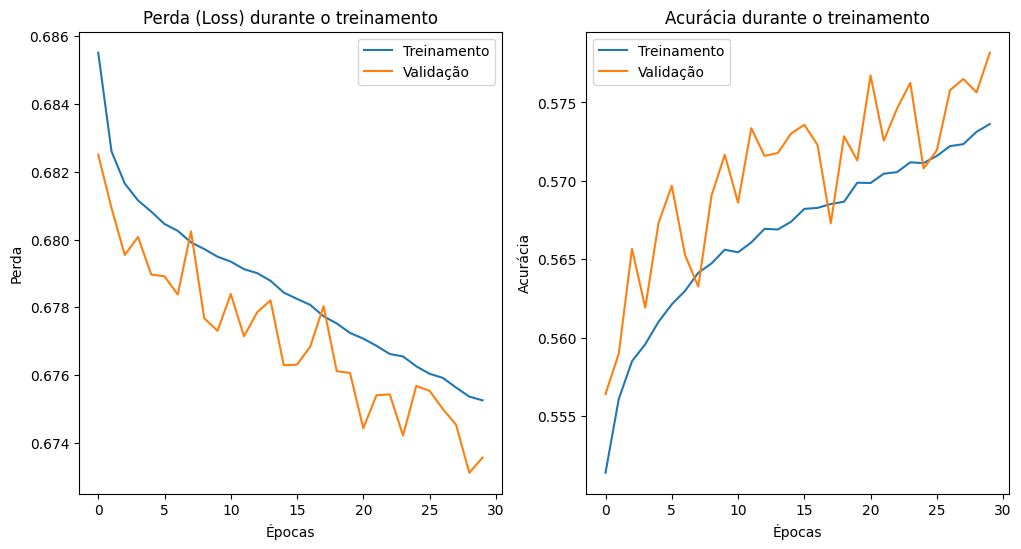

In [40]:
# Plotando a perda (loss)
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (Loss) durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Acurácia plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

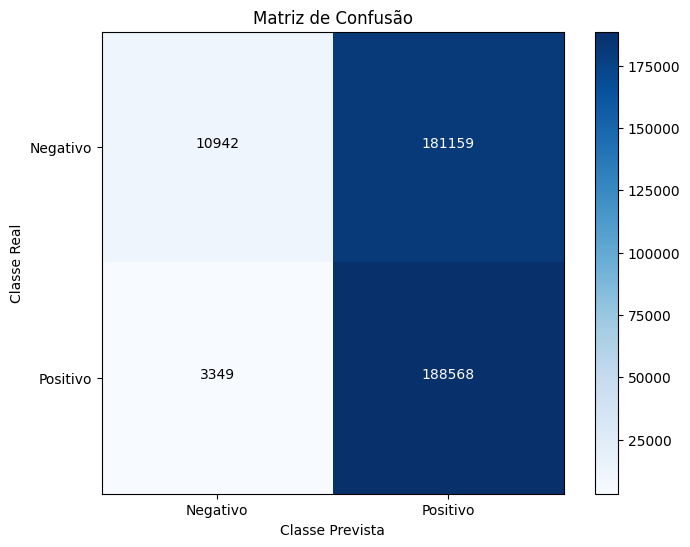

In [41]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = [0, 1]  # Para classificação binária
plt.xticks(tick_marks, ['Negativo', 'Positivo'])
plt.yticks(tick_marks, ['Negativo', 'Positivo'])

# Anotando os valores na matriz
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2. else 'black')

plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.06      0.11    192101
         1.0       0.51      0.98      0.67    191917

    accuracy                           0.52    384018
   macro avg       0.64      0.52      0.39    384018
weighted avg       0.64      0.52      0.39    384018



12001/12001 [==============================] - 25s 2ms/step


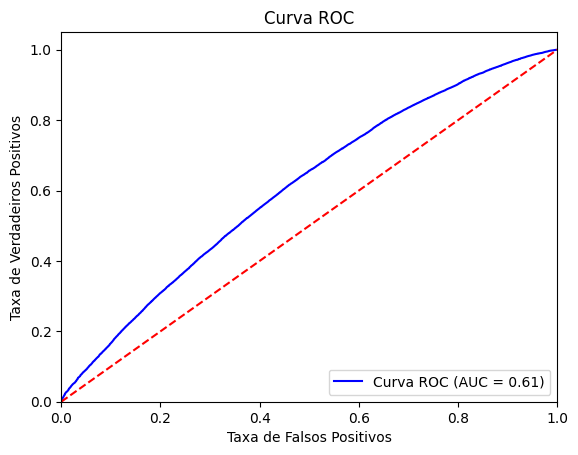

In [46]:
from sklearn.metrics import roc_curve, auc

# Calcular as probabilidades de previsão
y_scores = model.predict(X_test)  # já é o que você fez
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Antes - APAGAR

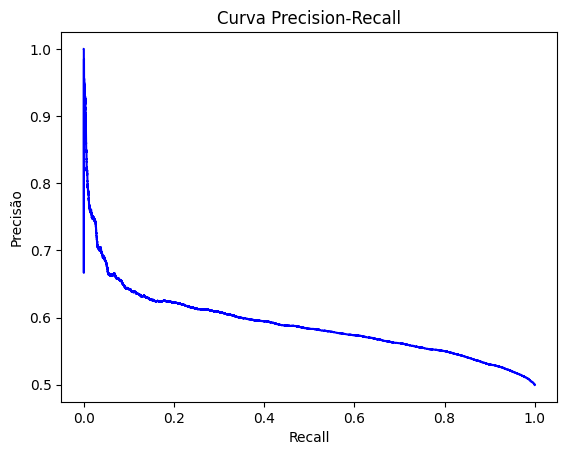

In [47]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plotar a curva Precision-Recall
plt.figure()
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.show()

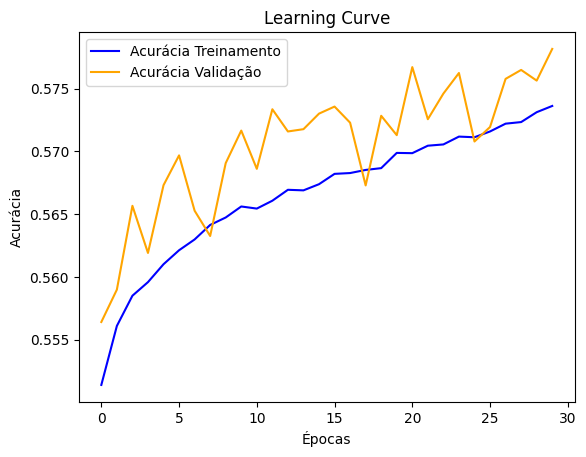

In [49]:
# Plotar a Learning Curve
plt.figure()
plt.plot(history.history['accuracy'], label='Acurácia Treinamento', color='blue')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação', color='orange')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Learning Curve')
plt.legend()
plt.show()

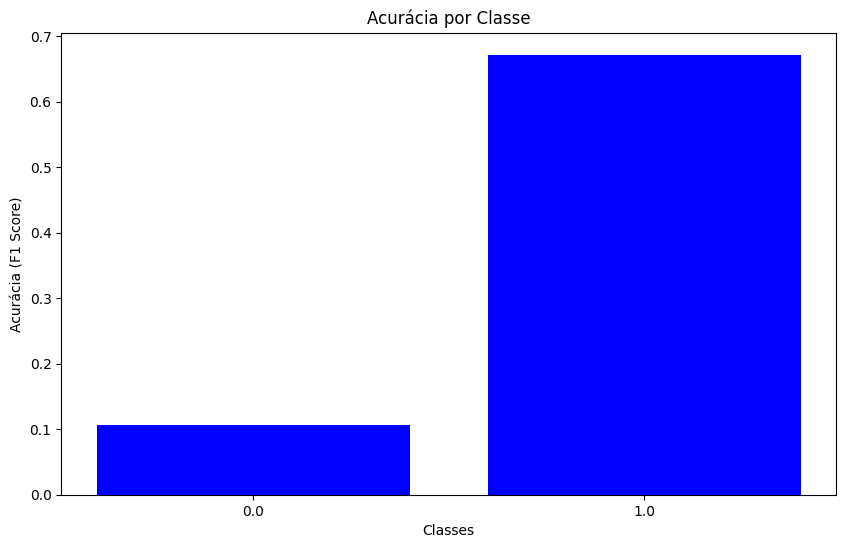

In [50]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
classes = list(report.keys())[:-3]  # Ignora as métricas 'accuracy', 'macro avg' e 'weighted avg'
accuracies = [report[cls]['f1-score'] for cls in classes]

# Plotar
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracies, color='blue')
plt.xlabel('Classes')
plt.ylabel('Acurácia (F1 Score)')
plt.title('Acurácia por Classe')
plt.show()

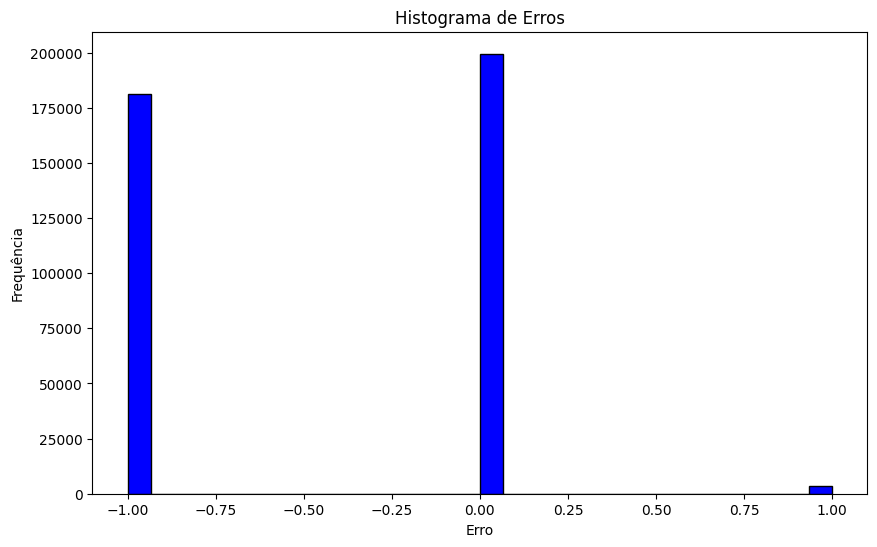

In [51]:
import numpy as np

errors = y_test - y_pred.flatten()  # Ajuste de formato se necessário

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, color='blue', edgecolor='black')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.title('Histograma de Erros')
plt.show()